In [1]:
SEED = 2306406

In [2]:
import pandas as pd 

df = pd.read_csv("./data/ibc.csv")
df.head()

,sentence,leaning
0,Union shop proponents point out that the `` fr...,Conservative
1,I started this section talking about how good ...,Conservative
2,He would end foreign aid and abolish five Cabi...,Conservative
3,Here 's how the scheme works : miss the requir...,Conservative
4,"As President , Barack Obama will create a pris...",Liberal


<Axes: >

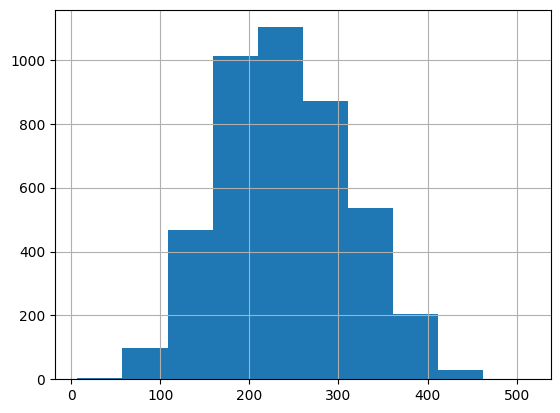

In [3]:
df["sentence-len"] = df["sentence"].apply(len)
df["sentence-len"].hist()

In [4]:
df.loc[df["sentence-len"] < 50,:].sort_values("sentence-len")

,sentence,leaning,sentence-len
1715,Gr \/ .,Neutral,7
153,Howard Dean ( D-Vt . ),Liberal,22
3749,Senator James Inhofe ( R-Okla . ),Conservative,33


In [5]:
df.loc[df["sentence-len"] >= 400, :]

,sentence,leaning,sentence-len
217,"In the new security environment , the United S...",Liberal,412
306,"As to this , Dr. Drexler offers this short lis...",Neutral,405
319,Members of the Creative Class are drawn to suc...,Liberal,404
449,Low capital costs are the result of a lot of p...,Conservative,408
520,"The Obama administration , together with assor...",Conservative,434
557,Most local school districts must contend with ...,Conservative,417
706,"Under the circumstances , President Obama migh...",Neutral,418
713,Del Vecchio 's words manifest not merely an et...,Liberal,409
871,"Abstract : For years , feminists have been war...",Liberal,400
1224,While experts will continue to debate the exac...,Liberal,400


array([[<Axes: title={'center': 'Conservative'}>,
        <Axes: title={'center': 'Liberal'}>],
       [<Axes: title={'center': 'Neutral'}>, <Axes: >]], dtype=object)

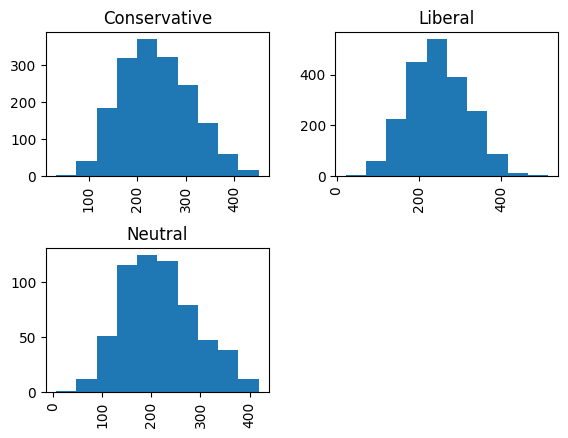

In [6]:
df.hist("sentence-len", by="leaning")

In [7]:
df = df.loc[df["sentence-len"] > 50,:]
df["ID"] = [f"ID-{i:04}" for i in range(len(df))]
df = df.set_index("ID")
df

,sentence,leaning,sentence-len
ID,,,
ID-0000,Union shop proponents point out that the `` fr...,Conservative,228
ID-0001,I started this section talking about how good ...,Conservative,92
ID-0002,He would end foreign aid and abolish five Cabi...,Conservative,381
ID-0003,Here 's how the scheme works : miss the requir...,Conservative,181
ID-0004,"As President , Barack Obama will create a pris...",Liberal,309
...,...,...,...
ID-4318,Our plan was straightforward : Make private-se...,Liberal,370
ID-4319,Only the Western occupiers have the planes to ...,Liberal,295
ID-4320,"What 's more , virtually every subsidiary Repu...",Liberal,258


In [8]:
def preprocess_text(text: str):
    if not(isinstance(text, str)):
        return pd.NA
    return (
        text
        .replace("``", '"')
        .replace("''", '"')
        .replace(" ,", ",")
        .replace(" .", ".")
        .replace(" !", "!")
        .replace(" ?", "?")
        .replace(" :", ":")
        .replace(" 's", "'s")
    )
df["sentence-preprocessed"] = df["sentence"].apply(preprocess_text)

In [9]:
df

,sentence,leaning,sentence-len,sentence-preprocessed
ID,,,,
ID-0000,Union shop proponents point out that the `` fr...,Conservative,228,"Union shop proponents point out that the "" fre..."
ID-0001,I started this section talking about how good ...,Conservative,92,I started this section talking about how good ...
ID-0002,He would end foreign aid and abolish five Cabi...,Conservative,381,He would end foreign aid and abolish five Cabi...
ID-0003,Here 's how the scheme works : miss the requir...,Conservative,181,Here's how the scheme works: miss the required...
ID-0004,"As President , Barack Obama will create a pris...",Liberal,309,"As President, Barack Obama will create a priso..."
...,...,...,...,...
ID-4318,Our plan was straightforward : Make private-se...,Liberal,370,Our plan was straightforward: Make private-sec...
ID-4319,Only the Western occupiers have the planes to ...,Liberal,295,Only the Western occupiers have the planes to ...
ID-4320,"What 's more , virtually every subsidiary Repu...",Liberal,258,"What's more, virtually every subsidiary Republ..."


# Checkpoint

In [10]:
from datasets import Dataset

ds = Dataset.from_pandas(df[["sentence-preprocessed","leaning"]])
ds = ds.with_format("torch")
ds = ds.rename_columns({
    "sentence-preprocessed":"text",
    "leaning":"labels_text"
})
ds

/opt/miniconda3/envs/encoder-tuto/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset({
    features: ['text', 'labels_text', 'ID'],
    num_rows: 4323
})

In [11]:
dsd = ds.train_test_split(test_size = 0.2, shuffle=True, seed=SEED)

# Create an eval dataset
temp = dsd["train"].train_test_split()
dsd["train"] = temp["train"]
dsd["eval"] = temp["test"]

dsd

DatasetDict({
    train: Dataset({
        features: ['text', 'labels_text', 'ID'],
        num_rows: 2593
    })
    test: Dataset({
        features: ['text', 'labels_text', 'ID'],
        num_rows: 865
    })
    eval: Dataset({
        features: ['text', 'labels_text', 'ID'],
        num_rows: 865
    })
})

In [12]:
labels = list(df["leaning"].unique())
num_labels = len(labels)
id2label = {id:label for id, label in enumerate(labels)}
label2id = {label:id for id, label in enumerate(labels)}

print(f'''
num_labels : {num_labels}
id2label : {id2label}
label2id : {label2id}
'''
)


num_labels : 3
id2label : {0: 'Conservative', 1: 'Liberal', 2: 'Neutral'}
label2id : {'Conservative': 0, 'Liberal': 1, 'Neutral': 2}



In [13]:
from transformers import AutoModel, AutoModelForSequenceClassification

# MODEL_NAME = "distilbert/distilbert-base-uncased"
MODEL_NAME = "google-bert/bert-base-uncased"
classif_model = AutoModelForSequenceClassification.from_pretrained(
    MODEL_NAME, 
    num_labels=num_labels,
    id2label=id2label,
    label2id=label2id                                            
)
classif_model

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [14]:
classif_model.config

BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "Conservative",
    "1": "Liberal",
    "2": "Neutral"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "Conservative": 0,
    "Liberal": 1,
    "Neutral": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.52.4",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [15]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

In [16]:
entry = [
    "Hello World",
    "This is a second query"
]

tokenizer_parameters = {
    "truncation":True, 
    "padding":"max_length",
    "max_length":400,
    "return_tensors":"pt"
}

model_input = tokenizer(entry,**tokenizer_parameters)
base_model_output = classif_model.base_model(**model_input)
classif_model_output = classif_model(**model_input)
print(f'''
# model input keys: {', '.join(model_input)}
model input shape (pytorch tensor): {model_input["input_ids"].shape}
base model output keys: {', '.join(base_model_output)}
base model output last_hidden_state shape (pytorch tensor): {base_model_output.last_hidden_state.shape}
classification model output key: {', '.join(classif_model_output)}
classification model output logits shape (pytorch tensor): {classif_model_output.logits.shape}
''')


# model input keys: input_ids, token_type_ids, attention_mask
model input shape (pytorch tensor): torch.Size([2, 400])
base model output keys: last_hidden_state, pooler_output
base model output last_hidden_state shape (pytorch tensor): torch.Size([2, 400, 768])
classification model output key: logits
classification model output logits shape (pytorch tensor): torch.Size([2, 3])



In [17]:
from typing import Any

# TODO: make device choice better

def preprocess_dataset(row: dict[str:Any]):
    tokenized_entry = tokenizer(row["text"], **tokenizer_parameters)
    return {
        **row.copy(),
        "labels": int(label2id[row["labels_text"]]),
        "attention_mask" : tokenized_entry["attention_mask"].reshape(-1).to(device = "mps"),
        "input_ids" : tokenized_entry["input_ids"].reshape(-1).to(device="mps")
    }

dsd = dsd.map(preprocess_dataset, batch_size=32)

Map:   0%|          | 0/2593 [00:00<?, ? examples/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Map: 100%|██████████| 865/865 [00:01<00:00, 668.04 examples/s] 


In [18]:
from transformers import TrainingArguments, Trainer, DataCollatorWithPadding
training_arguments = TrainingArguments(
    # Hyperparameters
    num_train_epochs = 5,
    learning_rate = 5e-5,
    weight_decay  = 0.0,
    warmup_ratio  = 0.0,
    optim = "adamw_torch_fused",
    # Second order hyperparameters
    per_device_train_batch_size = 4,
    per_device_eval_batch_size = 4,
    gradient_accumulation_steps = 8,
    # Metrics
    # metric_for_best_model="f1_macro",
    # Pipe
    output_dir = "./models/training",
    overwrite_output_dir=True,
    eval_strategy = "epoch",
    logging_strategy = "epoch",
    save_strategy = "epoch",
    load_best_model_at_end = True,
    save_total_limit = 5 + 1,

    disable_tqdm = False,
)

# TODO: Use dataloader instead
trainer = Trainer(
    model = classif_model, 
    args = training_arguments,
    train_dataset=dsd["train"],
    eval_dataset=dsd["eval"],
    # data_collator=DataCollatorWithPadding(tokenizer=tokenizer)
)

In [19]:
trainer.train()

/opt/miniconda3/envs/encoder-tuto/lib/python3.11/site-packages/torch/utils/data/dataloader.py:775: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  super().__init__(loader)


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 